## Analysis
* The correlation between mouse weight and average tumor volume on the Capomulin regimen is 0.84, indicating a strong positive correlation between tumor volume and weight.
* Capomulin and Ranicane seem to be the best performing drug regimens based on summary statistics of tumor size. They also happen to be the two regimens with the most mice participating.
* The tumor size of mouse j246 who was on the Capomulin treatment had their tumor greatly decrease in size between days 25 and 30 of treatment, after which the tumor size went slightly up. More insights should be gathered on duration of treatment and tumor size for all regimens to gauge effectiveness over time.

## Prepare the data

In [166]:
%matplotlib notebook
%matplotlib inline

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [168]:
# Checking the number of mice.
unique_mice = merge_df["Mouse ID"].nunique()
unique_mice

249

In [169]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoints
duplicate = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate['Mouse ID'].unique()

array(['g989'], dtype=object)

In [170]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.drop(merge_df[merge_df['Mouse ID'] == "g989"].index, inplace = True)
clean_df = merge_df
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [172]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [173]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen_group["Tumor Volume (mm3)"].median()
tumor_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
tumor_stdev = drug_regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                "Median Tumor Volume":tumor_median,
                                "Tumor Volume Variance":tumor_variance,
                                "Tumor Volume Std. Dev.":tumor_stdev,
                                "Tumor Volume Std. Err.":tumor_sem })
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [174]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

tumor_summary_stats = clean_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

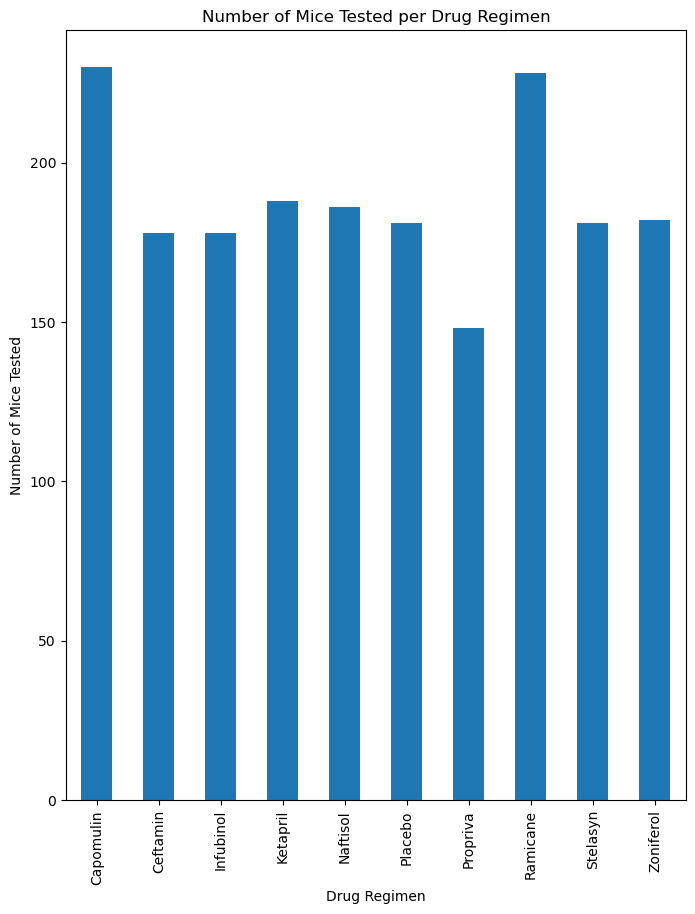

In [175]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = drug_regimen_group['Timepoint'].count()
pandas_bar = pd.DataFrame({'Mice Tested': mice_tested})
pandas_bar_chart = pandas_bar.plot(kind='bar', figsize=[8, 10], title="Number of Mice Tested per Drug Regimen", ylabel='Number of Mice Tested', legend=False)
pandas_bar_chart

In [176]:
#end interaction with previous graph
plt.close()

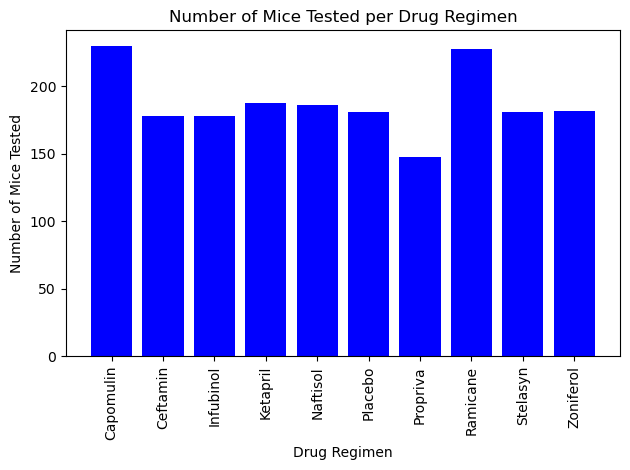

In [177]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot. 

# Set x axis and tick locations
drug_regimens = pandas_bar.index
x_axis = np.arange(len(drug_regimens))
tick_locations = [value for value in x_axis]

# Generate bar plot
plt.bar(x_axis, mice_tested, color='b', align="center")

# Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(tick_locations, drug_regimens, rotation=90)

#generate the plot in tight layout to fit
plt.tight_layout()
plt.show()


In [178]:
#end interaction with previous graph
plt.close()

<AxesSubplot:title={'center':'Sex Distribution of Mice'}>

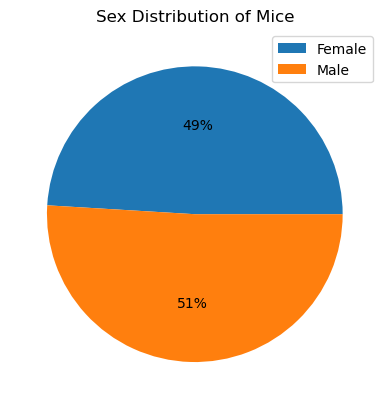

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#make a dataframe grouping by sex
sex_groupby = clean_df.groupby(['Sex'])
sex_dist = sex_groupby['Mouse ID'].count()
sex_pandas = pd.DataFrame({'Number of Mice': sex_dist})

#generate pie using Pandas
sex_pandas_pie = sex_pandas.plot(kind='pie', title="Sex Distribution of Mice", y='Number of Mice', labels=None, label="", autopct='%1.0f%%')
sex_pandas_pie

In [180]:
#end interaction with previous graph
plt.close()

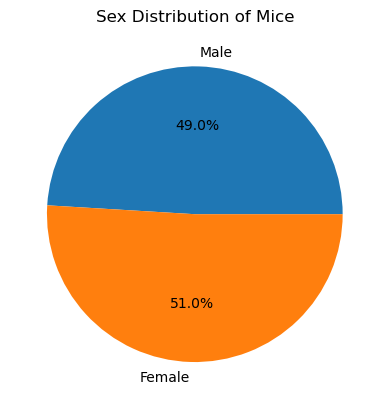

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df['Sex'].unique()
plt.pie(sex_dist, labels=labels, autopct="%1.1f%%")
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers, and Boxplots

In [182]:
#end interaction with previous graph
plt.close()

In [183]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse
last_tumor_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(last_tumor_df, clean_df, how='inner', left_on=['Mouse ID', 'Last Timepoint'], right_on=['Mouse ID', 'Timepoint'])


In [184]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == treatment]

    # add subset 
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Last Timepoint']]
    #final_volume_df.reset_index()
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_volume.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Quantitatively check for outliers through count
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{treatment} potential outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Capomulin potential outliers: 0
IQR for Ramicane: 9.098536719999998
Ramicane potential outliers: 0
IQR for Infubinol: 11.477135160000003
Infubinol potential outliers: 1
IQR for Ceftamin: 15.577752179999997
Ceftamin potential outliers: 0


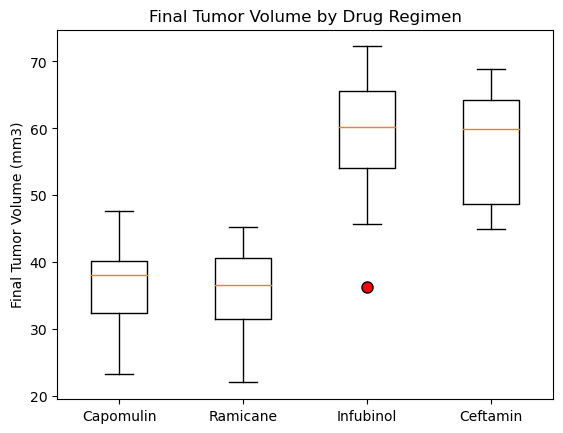

In [185]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Edit outliers in boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume, flierprops=flierprops)
 
# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

In [186]:
#end interaction with previous graph
plt.close()

## Line and Scatter Plots

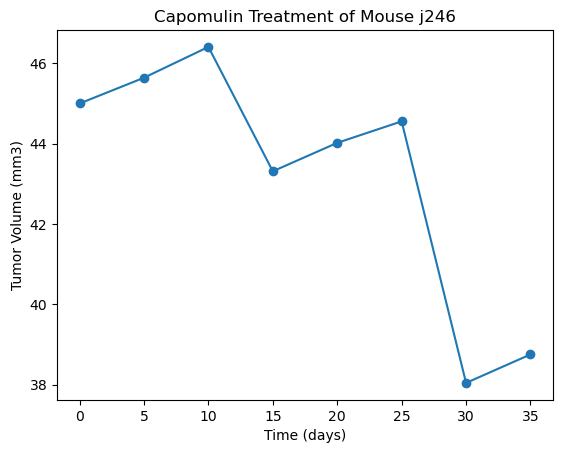

In [187]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouseb742 = clean_df.loc[clean_df['Mouse ID'] == 'j246',:]

# Generate line plot with time on x-axis and tumor volume on y-axis
plt.plot(mouseb742['Timepoint'], mouseb742['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse j246")

# Display plot
plt.show()

In [188]:
#end interaction with previous graph
plt.close()

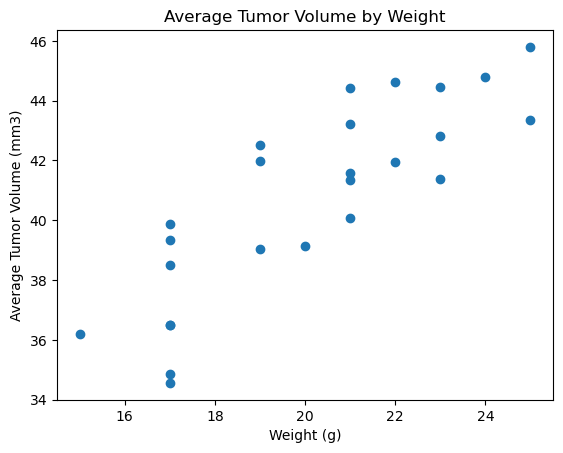

In [189]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Cases that only use the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})

# Merge average tumor volume and drop duplicates
avg_vol_df2 = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df2[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()

# Assign x to weight and y to average tumor volume
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Avg Tumor Volume']

# Generate scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()


In [190]:
#end interaction with previous graph
plt.close()

## Correlation and Regression

The correlation between mouse weight and average tumor volume
on the Capomulin regimen is 0.84.


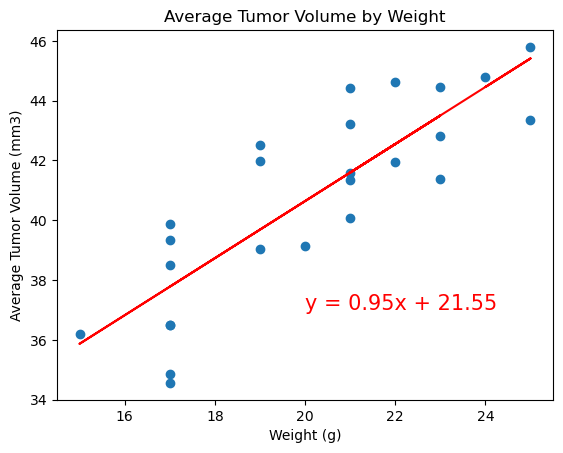

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate plot from above
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Avg Tumor Volume']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between mouse weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


In [192]:
#end interaction with previous graph
plt.close()